# Importation des données

In [1]:
import pickle

with open('.\\data\\prepared_data\\useful\\X_useful_train.pkl', 'rb') as f:
    X_useful_train = pickle.load(f)
    
with open('.\\data\\prepared_data\\useful\\Y_useful_train.pkl', 'rb') as f:
    y_useful_train = pickle.load(f)

with open('.\\data\\prepared_data\\useful\\X_useful_test.pkl', 'rb') as f:
    X_useful_test = pickle.load(f)
    
with open('.\\data\\prepared_data\\useful\\Y_useful_test.pkl', 'rb') as f:
    y_useful_test = pickle.load(f)

# Entrainement des modèles

## SGD Classifier

In [2]:
from sklearn.linear_model import SGDClassifier

# Instantiate classifier
sgd_clf = SGDClassifier(random_state=42)

# Fit classifier
sgd_clf.fit(X_useful_train, y_useful_train)

SGDClassifier(random_state=42)

In [3]:
from sklearn.model_selection import cross_val_score

# Cross-validate classifier
cross_val_score(sgd_clf, X_useful_train, y_useful_train, cv=3, scoring="accuracy")

array([0.82823129, 0.84183673, 0.84863946])

In [4]:
from sklearn.model_selection import cross_val_predict

# Cross-validate classifier
y_train_pred = cross_val_predict(sgd_clf, X_useful_train, y_useful_train, cv=3)

In [5]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision_score(y_useful_train, y_train_pred)

0.5039787798408488

In [6]:
# Calculate recall
recall_score(y_useful_train, y_train_pred)

0.3339191564147627

In [7]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1_score(y_useful_train, y_train_pred)

0.40169133192389006

In [8]:
from sklearn.metrics import precision_recall_curve

# Show the precision/recall curve
y_scores = cross_val_predict(sgd_clf, X_useful_train, y_useful_train, 
                             cv=3, method="decision_function")

precision, recall, thresholds = precision_recall_curve(y_useful_train, y_scores)

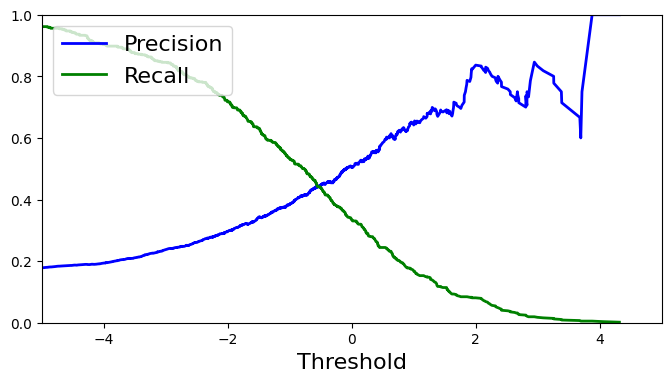

In [9]:
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlim([-5, 5])
plt.show()

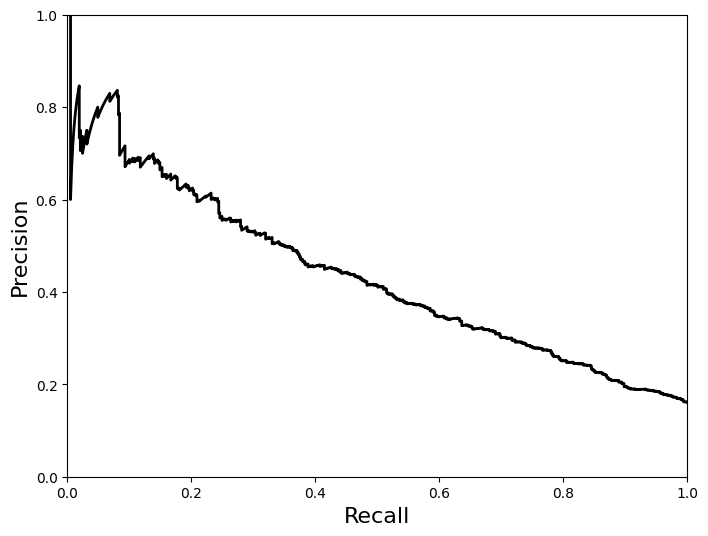

In [10]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

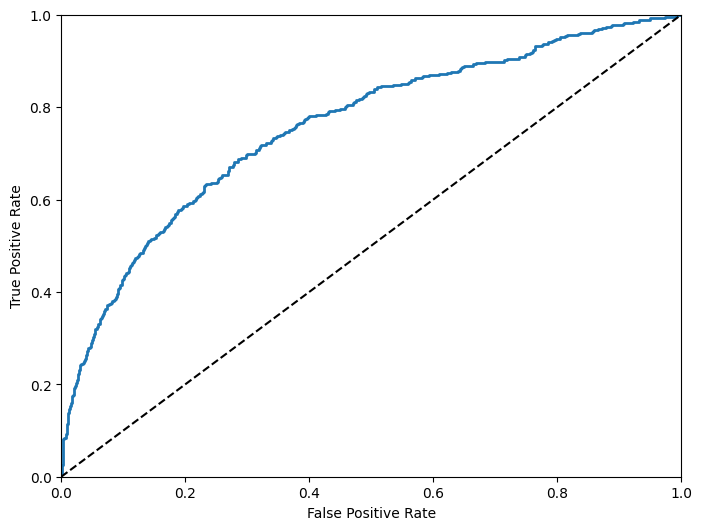

In [11]:
from sklearn.metrics import roc_curve

# Show the ROC curve
fpr, tpr, thresholds = roc_curve(y_useful_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
roc_auc_score(y_useful_train, y_scores)

0.757698505230535

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate classifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

# Fit classifier
forest_clf.fit(X_useful_train, y_useful_train)

y_probas_forest = cross_val_predict(forest_clf, X_useful_train, y_useful_train, cv=3, 
                                    method="predict_proba")

In [14]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_useful_train, y_scores_forest)

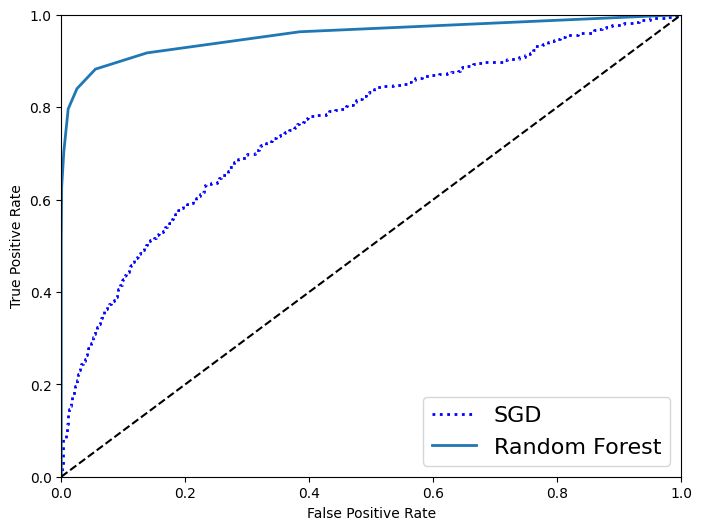

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [16]:
# Calculate AUC
roc_auc_score(y_useful_train, y_scores_forest)

0.9556825531828962

In [17]:
# Calculate precision
precision_score(y_useful_train, y_train_pred)

0.5039787798408488

In [18]:
# Calculate recall
recall_score(y_useful_train, y_train_pred)

0.3339191564147627

In [19]:
# Calculate F1 score
f1_score(y_useful_train, y_train_pred)

0.40169133192389006

In [20]:
# Show the precision/recall curve
y_scores_forest = forest_clf.predict_proba(X_useful_test)[:, 1]

precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_useful_test, y_scores_forest)

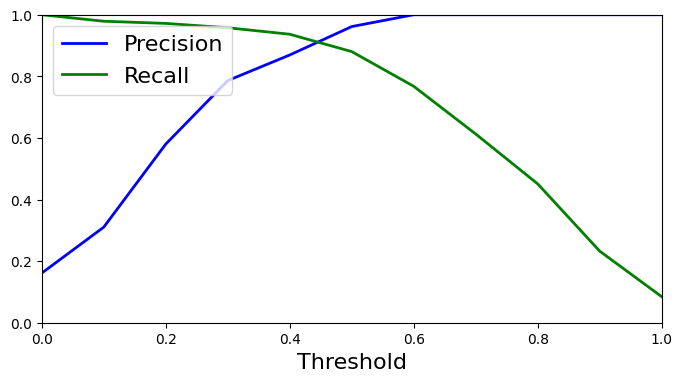

In [21]:
# Show the precision/recall curve
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision_forest, recall_forest, thresholds_forest)
plt.xlim([0.0, 1.0])
plt.show()

## Régression Logistique

In [22]:
from sklearn.linear_model import LogisticRegression

# Instantiate classifier
log_clf = LogisticRegression(random_state=42)

# Fit classifier
log_clf.fit(X_useful_train, y_useful_train)

c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [23]:
# Cross-validate
y_probas_log = cross_val_predict(log_clf, X_useful_train, y_useful_train, cv=3, 
                                 method="predict_proba")

y_scores_log = y_probas_log[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_useful_train, y_scores_log)

c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

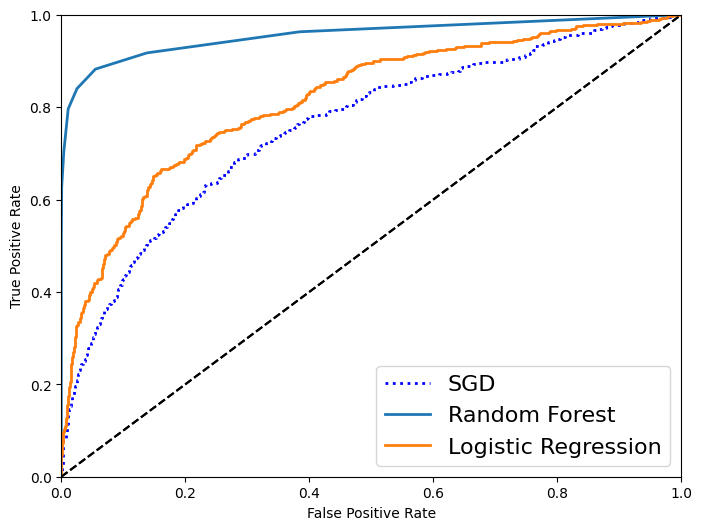

In [24]:
# Show the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [25]:
# Calculate AUC
roc_auc_score(y_useful_train, y_scores_log)

0.8146520311866156

In [26]:
# Calculate precision
precision_score(y_useful_train, y_train_pred)

0.5039787798408488

In [27]:
# Calculate recall
recall_score(y_useful_train, y_train_pred)

0.3339191564147627

In [28]:
# Calculate F1 score
f1_score(y_useful_train, y_train_pred)

0.40169133192389006

In [29]:
# Show the precision/recall curve
y_scores_log = cross_val_predict(log_clf, X_useful_train, y_useful_train, cv=3, 
                             method="decision_function")

precision_log, recall_log, thresholds_log = precision_recall_curve(y_useful_train, y_scores_log)

c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

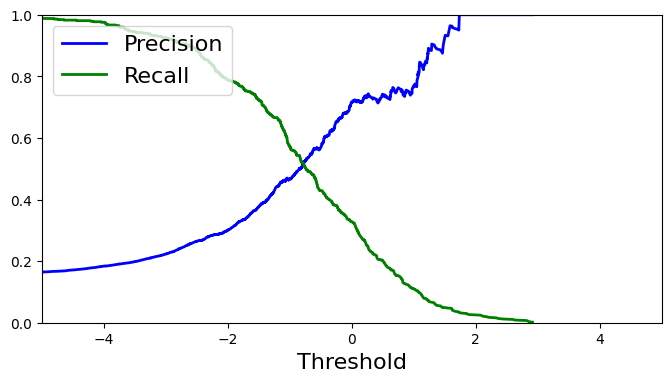

In [30]:
# Show the precision/recall curve
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision_log, recall_log, thresholds_log)
plt.xlim([-5, 5])
plt.show()

## Perceptron

In [31]:
from sklearn.linear_model import Perceptron

# Instantiate classifier
per_clf = Perceptron(random_state=42, max_iter=1000)

# Fit classifier
per_clf.fit(X_useful_train, y_useful_train)

Perceptron(random_state=42)

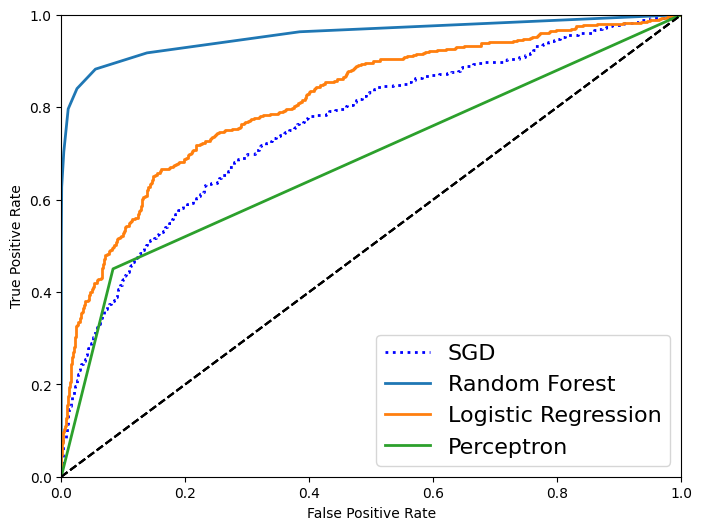

In [32]:
# Show the ROC curve
fpr_per, tpr_per, thresholds_per = roc_curve(y_useful_train, per_clf.predict(X_useful_train))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plot_roc_curve(fpr_per, tpr_per, "Perceptron")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Étude des résultats


Le ``RandomForestClassifier`` est le modèle qui a le meilleur score sur les données de test. Il est donc choisi pour la suite de l'étude.

On cherche à présent à savoir sur quel critère le modèle se base pour prédire si un employé va partir ou non l'année suivante.

In [33]:
import time
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd


def plot_feature_importances(X: pd.DataFrame, y: pd.DataFrame, title: str):
    """
    Plot the feature importances.

    Parameters
    ----------
    X : pandas.DataFrame
        The data to plot the feature importances.

    y : pandas.DataFrame
        The target to plot the feature importances.

    title : str
        The title of the plot.

    Returns
    -------
    None
    """
    feature_names = X.columns
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X, y)

    start_time = time.time()
    importances = forest.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in forest.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(
        f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity")
    fig.set_size_inches(10, 10)
    # Draw line at 0.01 threshold
    ax.axhline(y=0.05, linestyle='--', color='r')
    fig.tight_layout()


Elapsed time to compute the importances: 0.027 seconds


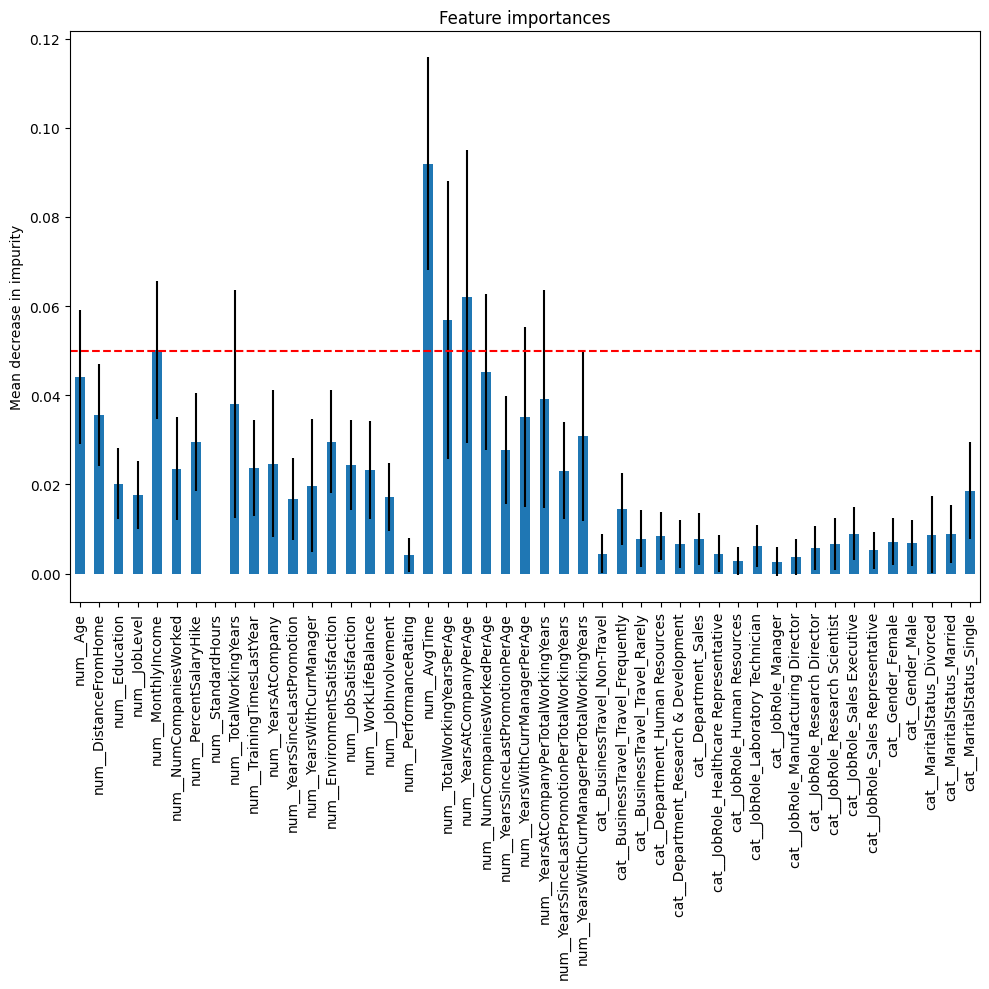

In [34]:
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# Analyser l'importance des variables
importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plot_feature_importances(X_useful_train, y_useful_train, "Feature importances")

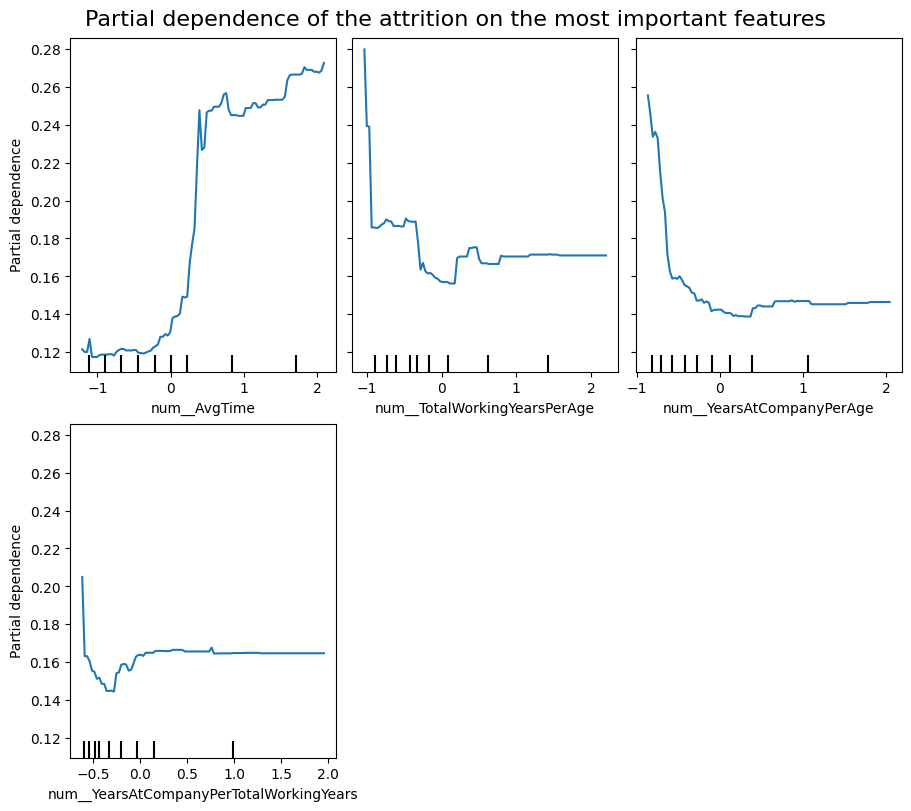

In [35]:
# Identifier les variables significatives
significant_features = X_useful_train.columns[importances > 0.05]

# Examiner les interactions entre les variables
# plot_partial_dependence(forest_clf, X_useful_train, significant_features)
_, ax = plt.subplots(figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    forest_clf,
    X_useful_train,
    significant_features,
    ax=ax
)
_ = display.figure_.suptitle(
    "Partial dependence of the attrition on the most important features",
    fontsize=16,
)

# Interpréter les résultats
predictions = forest_clf.predict(X_useful_test)


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_useful_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       740
           1       1.00      0.77      0.87       142

    accuracy                           0.96       882
   macro avg       0.98      0.88      0.92       882
weighted avg       0.96      0.96      0.96       882

